### Correlation Analysis

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

##### Import from pickle file

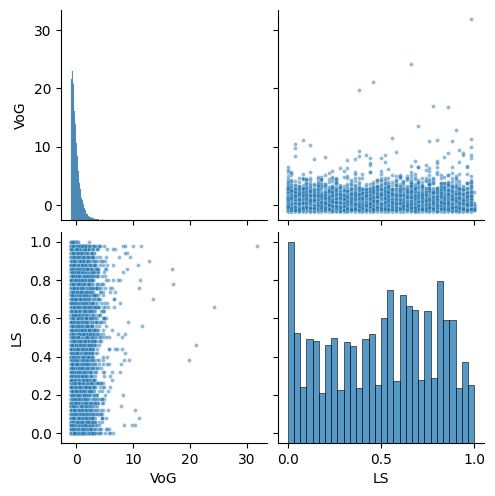

In [37]:
import pickle

with open("metrics.pkl", "rb") as f:
  metrics = pickle.load(f)
  vog = metrics["vog"]
  ls = metrics['learning_speed']
df = pd.DataFrame({"VoG": vog.cpu().numpy(), "LS": ls})
sns.pairplot(df, plot_kws={"s": 8, "alpha":0.5});

##### Import from csv file

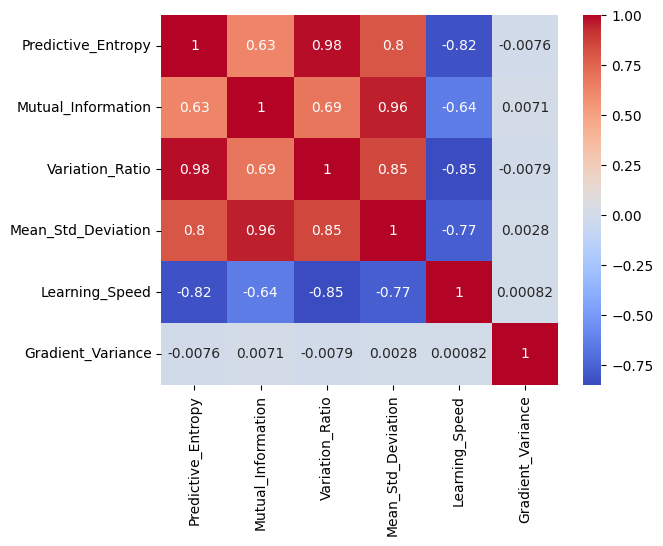

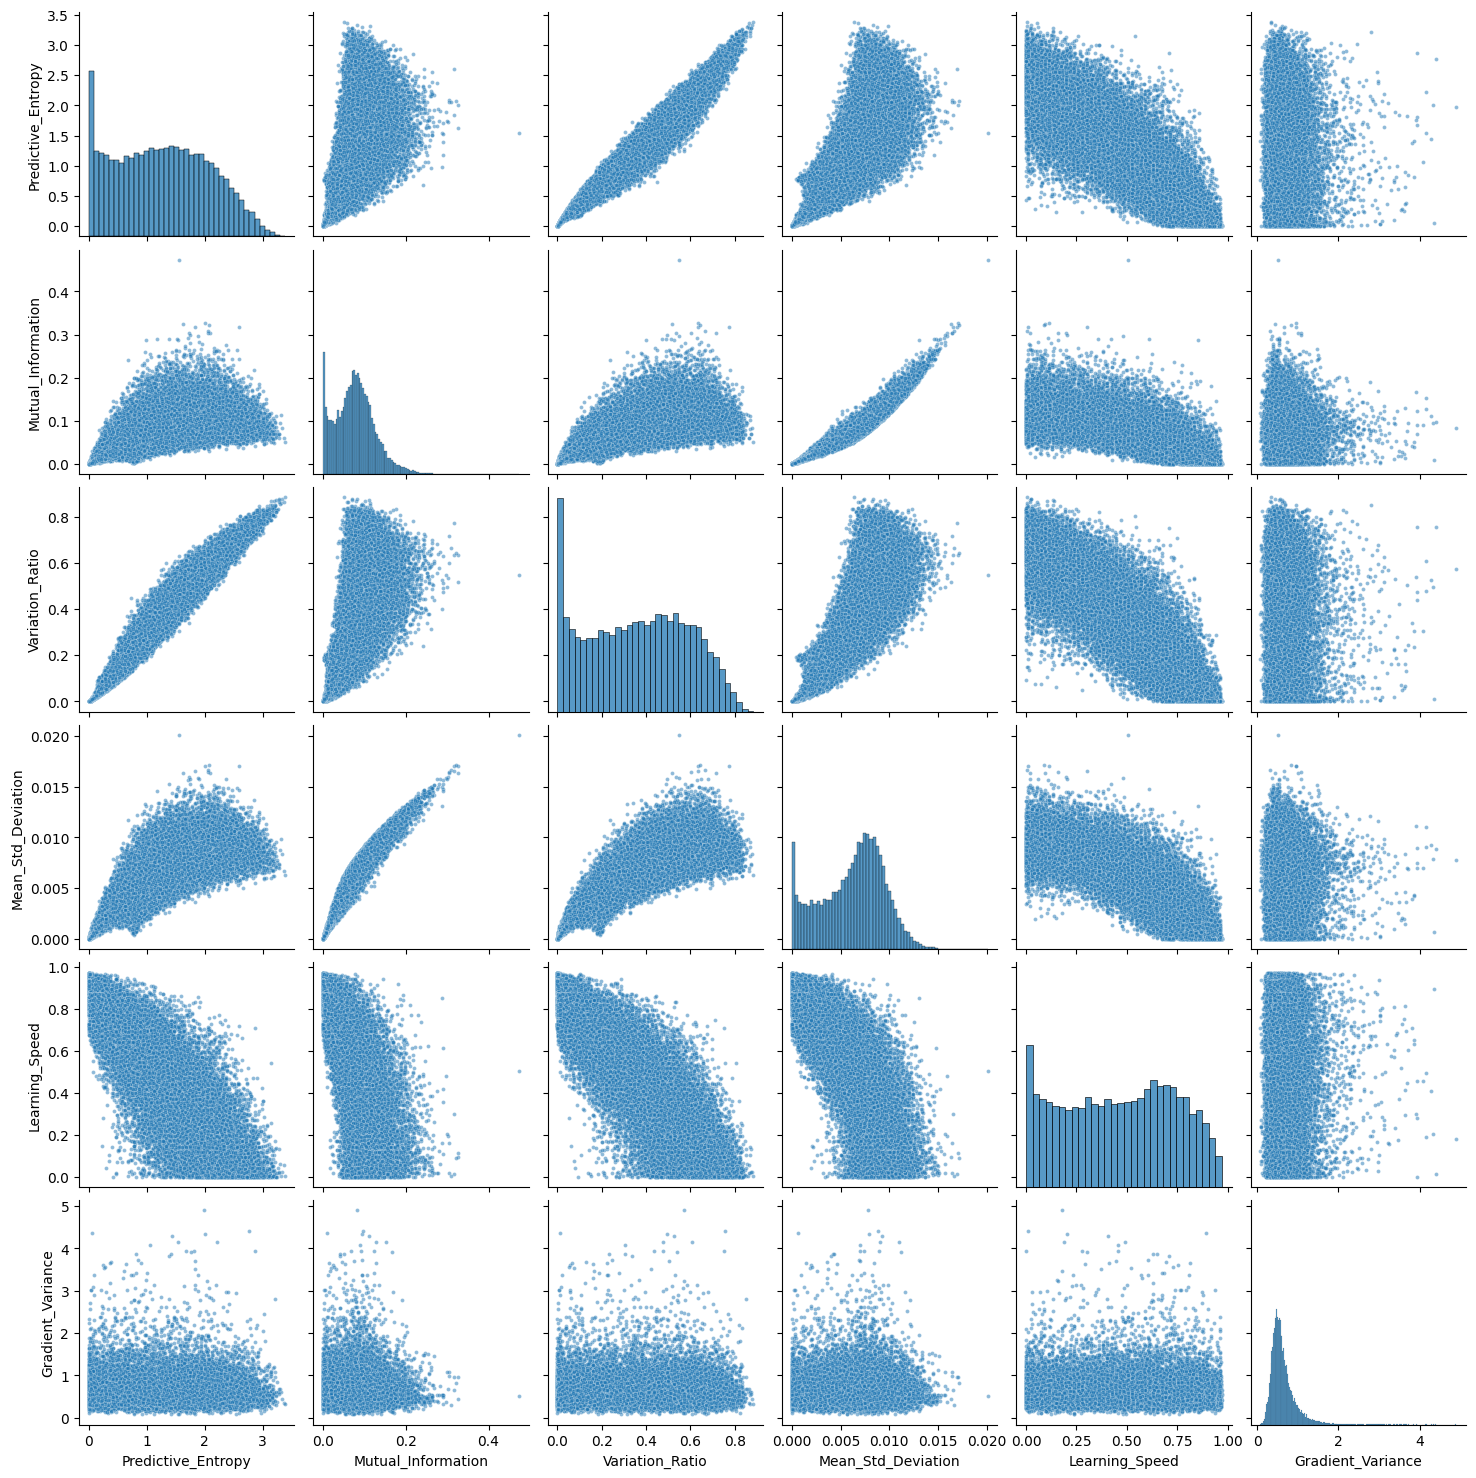

In [6]:
dfs = []
for seed in [31, 42, 69, 420, 80085]:
    filename = f"df_train_epochs50_seed{seed}"
    df = pd.read_csv(filename, index_col="Index")
    df = df.drop(columns=["Predicted_Class", "Label"])
    dfs.append(df)

concatenated = pd.concat(dfs, axis=0)
averaged_df = concatenated.groupby(concatenated.index).mean()
correlation_matrix = averaged_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
sns.pairplot(averaged_df, plot_kws={"s": 8, "alpha":0.5});

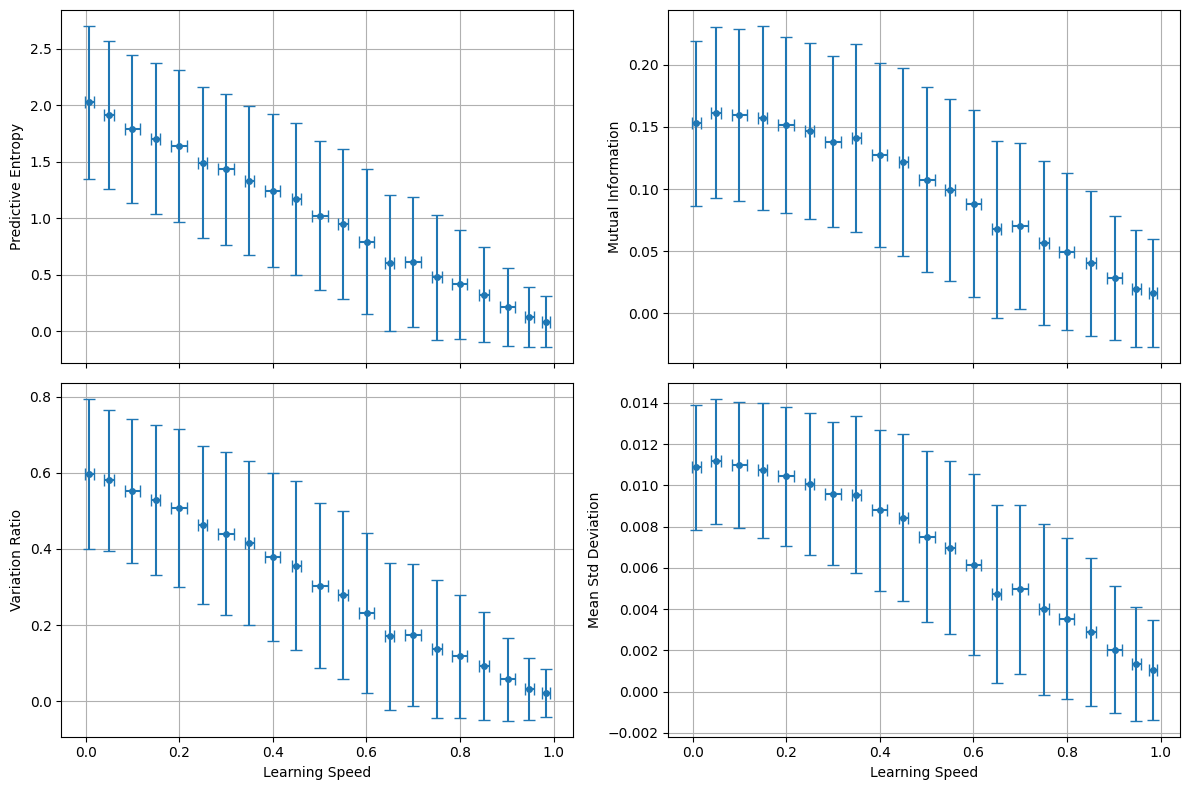

In [7]:
df = dfs[0]
# Define bins for grouping Learning Speed
learning_speed_bins = np.linspace(-0.025, 1.025, 22)
df['Learning_Speed_Binned'] = pd.cut(df['Learning_Speed'], bins=learning_speed_bins)

# Group by Learning Speed bins and calculate mean and standard deviation for each bin
grouped = df.groupby('Learning_Speed_Binned', observed=False).agg(
    Average_Learning_Speed=('Learning_Speed', 'mean'),
    Std_Learning_Speed=('Learning_Speed', 'std'),
    Predictive_Entropy_Mean=('Predictive_Entropy', 'mean'),
    Predictive_Entropy_Std=('Predictive_Entropy', 'std'),
    Mutual_Information_Mean=('Mutual_Information', 'mean'),
    Mutual_Information_Std=('Mutual_Information', 'std'),
    Variation_Ratio_Mean=('Variation_Ratio', 'mean'),
    Variation_Ratio_Std=('Variation_Ratio', 'std'),
    Mean_Std_Deviation_Mean=('Mean_Std_Deviation', 'mean'),
    Mean_Std_Deviation_Std=('Mean_Std_Deviation', 'std')
).reset_index()

# Plot with error bars
variables_to_plot = [
    ('Predictive_Entropy_Mean', 'Predictive_Entropy_Std'),
    ('Mutual_Information_Mean', 'Mutual_Information_Std'),
    ('Variation_Ratio_Mean', 'Variation_Ratio_Std'),
    ('Mean_Std_Deviation_Mean', 'Mean_Std_Deviation_Std')
]

fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
for i, (y_mean, y_std) in enumerate(variables_to_plot):
    row, col = i // 2, i % 2
    ax = axs[row, col]
    ax.errorbar(
        grouped['Average_Learning_Speed'],
        grouped[y_mean],
        xerr=grouped['Std_Learning_Speed'],
        yerr=grouped[y_std],
        fmt='o',
        markersize=4,
        capsize=4
    )
    if row == 1:
        ax.set_xlabel('Learning Speed')
    ax.set_ylabel(y_mean.replace('_Mean', '').replace('_', ' '))
    ax.grid()
plt.tight_layout()